## **Requirements**

1. When you work on this assignment, you should make a copy of this notebook in Google Colab. This can be done using the option `File > Save a copy in Drive` in Google Colab. 

2. You should fill in your answer for each task inside the code block right under the task. 

3. You should only insert your code into the designated code blocks, as mentioned above. Other than that, you shouldn't change anything else in the notebook, unless otherwise instructed.

4.  For each code block, you are free to use multiple lines of code. 

5.   Even if you can only partially solve a task, you should include your code in the code block, which allows us to consider partial credit. 

6.   However, your code should not raise errors. Any code raising errors will not get partial credit.
7.   The `Datasets.zip` contains 2 datasets in csv format  `employees.csv` and `Social_Network_Ads.csv` that you will work with them save them with your code in colab.

8.   We will test your code in Google Colab. Make sure your code runs in Google Colab.


9. To submit your assignment, download your Colab into a .ipynb file. This can be done using the option `Download > Download .ipynb` in Google Colab.

10. Submit the downloaded .ipynb file into the Programming Assignment 2 entry in Canvas.

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## **Task 1: Exploratory Data Analysis (EDA) (30 points)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the dataset(5pts)
**(1.1)**We will explore a dataset about employees. This dataset has 1000 rows and 8 columns. The dataset is provided as a CSV file `employees.csv` load it into a pandas `DataFrame` named `employees`.

In [ ]:
#Code task1
employees = pd.read_csv('/content/drive/MyDrive/Data Science Assignment/employees.csv')

## Understanding the dataset

In [ ]:
employees.head(10)

,FirstName,Gender,StartDate,LastLogin Time,Salary,Bonus %,SeniorManagement,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


In [ ]:
employees.shape

(1000, 8)

In [ ]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FirstName         933 non-null    object 
 1   Gender            855 non-null    object 
 2   StartDate         1000 non-null   object 
 3   LastLogin Time    1000 non-null   object 
 4   Salary            1000 non-null   int64  
 5   Bonus %           1000 non-null   float64
 6   SeniorManagement  933 non-null    object 
 7   Team              957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [ ]:
employees.describe()

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [ ]:
employees.isnull().sum()

FirstName            67
Gender              145
StartDate             0
LastLogin Time        0
Salary                0
Bonus %               0
SeniorManagement     67
Team                 43
dtype: int64

## FirstName, Gender, SeniorManagement and Team has null values.

**(1.2)**  Find out all the distinct values in the column Team. (5 points)

In [ ]:
#code 1.2
print(*employees['Team'].unique(), sep ="\n")

Marketing
nan
Finance
Client Services
Legal
Product
Engineering
Business Development
Human Resources
Sales
Distribution


**(1.3)** - Show how many data entries there are in each Team and the number of the senior Management for each team . (5 points)

In [ ]:
#code 1.3
Team_count = employees.groupby(['Team'])[['Team']].count()
Senior_team = employees.groupby(['Team'])[['SeniorManagement']].sum()
combined= pd.concat([Team_count,Senior_team], axis =1)
combined

,Team,SeniorManagement
Team,,
Business Development,101,54
Client Services,106,42
Distribution,90,38
Engineering,92,49
Finance,102,46
Human Resources,91,45
Legal,88,41
Marketing,98,49
Product,95,38


**(1.4)** - Show 3 random data instances (rows) for each class (Senior Management). (5 points)

In [ ]:
#code 1.4
employees.groupby(['SeniorManagement']).sample(3)

,FirstName,Gender,StartDate,LastLogin Time,Salary,Bonus %,SeniorManagement,Team
190,Carol,Female,3/19/1996,3:39 AM,57783,9.129,False,Finance
487,Cheryl,Female,12/3/2014,9:27 AM,71751,15.918,False,Business Development
460,Tina,Female,1/17/2005,9:11 AM,88276,14.248,False,Legal
888,Marilyn,Female,10/8/2007,12:32 AM,115149,11.934,True,Legal
969,Linda,Female,2/4/2010,8:49 PM,44486,17.308,True,Engineering
760,Shawn,Male,12/29/2006,3:05 AM,57871,4.020,True,Human Resources


**(1.5)** - Show the **number** of distinct values in each of these columns: `Start Date`, `Gender`, `Last Login Time`,`Bonus %`. (5 points)

In [ ]:
#Code 1.5
def distinct(data, column):
  print(f'Distinct values in {column} = {data[column].nunique()}')

distinct(employees, 'StartDate')
distinct(employees, 'Gender')
distinct(employees, 'LastLogin Time')
distinct(employees, 'Bonus %')

Distinct values in StartDate = 972
Distinct values in Gender = 2
Distinct values in LastLogin Time = 720
Distinct values in Bonus % = 971


**(1.6)** - Find the minimum  and the maximum bonus in the `Bonus %` column. (5 points)

In [ ]:
#Code 1.6
print(f"Maximum Bonus = {employees['Bonus %'].max()}")
print(f"Minimum Bonus = {employees['Bonus %'].min()}")

Maximum Bonus = 19.944
Minimum Bonus = 1.015


## **Task 2: Data preprocessing (40 points)**

**(2.1)** cheking of missing data for each column (5points)

In [ ]:
#code2.1
employees.isnull().sum()

FirstName            67
Gender              145
StartDate             0
LastLogin Time        0
Salary                0
Bonus %               0
SeniorManagement     67
Team                 43
dtype: int64

**(2.2)**Take care of missing data with expalnation (5points)

In [ ]:
#Checking for empty spaces and replaced it with NaN
employees = employees.replace(r'^\s*$', np.nan, regex=True)
employees.isnull().sum()

FirstName            67
Gender              145
StartDate             0
LastLogin Time        0
Salary                0
Bonus %               0
SeniorManagement     67
Team                 43
dtype: int64

## SeniorManagement column has 67 missing values. This column is the dependent variable. So we cannot replace this 67 rows with anything. This will only reduce the model performance.
The different approaches that we can do are:-
1.   We can remove those 67 rows and train with remaining data. 
2.   We can train a model with the 933 rows of data and predict the for this 67 rows but, the performance of the new model depends on the prediction of these 67 rows.


In [ ]:
#code2.2
# Removing all rows with all the 4 columns with NaN values.
employees = employees.dropna(subset=['FirstName', 'Gender', 'SeniorManagement', 'Team'], how='all')
# Removing all rows with SeniorManagement as NaN values. 
employees = employees.dropna(subset=['SeniorManagement'])
# We cannot replace anything for the First Name.
employees['FirstName'].fillna('Unkown', inplace=True)
# Many people could prefer to keep their gender a secret, and some of them prefer not to say. We can substitute the NaN values and treat it as "Other".
employees['Gender'].fillna('Other', inplace=True)
# NaN values in 'Team' column is replaced with mode of the data.
employees['Team'].fillna(employees['Team'].mode()[0], inplace=True)
employees.isna().sum()

FirstName           0
Gender              0
StartDate           0
LastLogin Time      0
Salary              0
Bonus %             0
SeniorManagement    0
Team                0
dtype: int64

**(2.3)** **- Nominal attributes**

The columns `Team` and `Gender` are nominal attributes, as there isn't a meaningful order among the attribute values. Write a piece of code to transform these three attributes into numerical attributes using *label encoding*. More specifically, assign one distinct integer for each distinct value in such an attribute. Use `preprocessing.LabelEncoder()` from the `sklearn` library. 
(5 points)

In [ ]:
#code 2.3
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
# for the team column
employees['Team']=label_encoder.fit_transform(employees.Team)
# for the Gender column
employees['Gender']=label_encoder.fit_transform(employees.Gender)
employees

,FirstName,Gender,StartDate,LastLogin Time,Salary,Bonus %,SeniorManagement,Team
0,Douglas,1,8/6/1993,12:42 PM,97308,6.945,True,7
1,Thomas,1,3/31/1996,6:53 AM,61933,4.170,True,1
2,Maria,0,4/23/1993,11:17 AM,130590,11.858,False,4
3,Jerry,1,3/4/2005,1:00 PM,138705,9.340,True,4
4,Larry,1,1/24/1998,4:47 PM,101004,1.389,True,1
...,...,...,...,...,...,...,...,...
995,Henry,2,11/23/2014,6:09 AM,132483,16.655,False,2
996,Phillip,1,1/31/1984,6:30 AM,42392,19.675,False,4
997,Russell,1,5/20/2013,12:39 PM,96914,1.421,False,8
998,Larry,1,4/20/2013,4:45 PM,60500,11.985,False,0


**(2.4)**convert the values in columns `Start Date`  to `datetime`   (5 points)

In [ ]:
#code2.4
# This will create a datetime object.
employees['StartDate'] = pd.to_datetime(employees['StartDate'])
employees.head(5)

,FirstName,Gender,StartDate,LastLogin Time,Salary,Bonus %,SeniorManagement,Team
0,Douglas,1,1993-08-06,12:42 PM,97308,6.945,True,7
1,Thomas,1,1996-03-31,6:53 AM,61933,4.170,True,1
2,Maria,0,1993-04-23,11:17 AM,130590,11.858,False,4
3,Jerry,1,2005-03-04,1:00 PM,138705,9.340,True,4
4,Larry,1,1998-01-24,4:47 PM,101004,1.389,True,1


**(2.5)**Create separate columns for months,days and years---new columns `Start_month`, `Start_day` and `Start_year` to replace `Start Date`
Check out this page to find out how to fetch the month, the day  and the year in a value of type `datatime`: https://docs.python.org/3/library/datetime.html#datetime.date.month.
(5points)

In [ ]:
#code2.5
employees['Start_month'], employees['Start_day'], employees['Start_year'] = employees['StartDate'].dt.month, employees['StartDate'].dt.day, employees['StartDate'].dt.year
employees.head(5)


,FirstName,Gender,StartDate,LastLogin Time,Salary,Bonus %,SeniorManagement,Team,Start_month,Start_day,Start_year
0,Douglas,1,1993-08-06,12:42 PM,97308,6.945,True,7,8,6,1993
1,Thomas,1,1996-03-31,6:53 AM,61933,4.170,True,1,3,31,1996
2,Maria,0,1993-04-23,11:17 AM,130590,11.858,False,4,4,23,1993
3,Jerry,1,2005-03-04,1:00 PM,138705,9.340,True,4,3,4,2005
4,Larry,1,1998-01-24,4:47 PM,101004,1.389,True,1,1,24,1998


**(2.6)** - Remove columns `Start date`  from the `DataFrame` `employees`. We only need to use the 3 newly created columns from (3.3). (5points)

In [ ]:
#code2.6
employees.drop(columns = 'StartDate', axis = 1, inplace = True)
employees.head(5)

,FirstName,Gender,LastLogin Time,Salary,Bonus %,SeniorManagement,Team,Start_month,Start_day,Start_year
0,Douglas,1,12:42 PM,97308,6.945,True,7,8,6,1993
1,Thomas,1,6:53 AM,61933,4.170,True,1,3,31,1996
2,Maria,0,11:17 AM,130590,11.858,False,4,4,23,1993
3,Jerry,1,1:00 PM,138705,9.340,True,4,3,4,2005
4,Larry,1,4:47 PM,101004,1.389,True,1,1,24,1998


**(2.7)** Encoding the Dependent Variable(Senior Management)(5points)

In [ ]:
#code 2.7
# True is represented as 1 and False is represented as 0
employees['Senior Management'] = label_encoder.fit_transform(employees.SeniorManagement)
# Dropping the SeniorManagment in the middle
employees.drop(columns = 'SeniorManagement', axis = 1, inplace = True)
employees.head(5)

,FirstName,Gender,LastLogin Time,Salary,Bonus %,Team,Start_month,Start_day,Start_year,Senior Management
0,Douglas,1,12:42 PM,97308,6.945,7,8,6,1993,1
1,Thomas,1,6:53 AM,61933,4.170,1,3,31,1996,1
2,Maria,0,11:17 AM,130590,11.858,4,4,23,1993,0
3,Jerry,1,1:00 PM,138705,9.340,4,3,4,2005,1
4,Larry,1,4:47 PM,101004,1.389,1,1,24,1998,1


**(2.8)** Splitting the dataset into the Training set and Test set.Use 80% of the data for tarining and 20% for test.
(5points) 

In [ ]:
# These are the features takena as the independent variables. 
employees[['Gender', 'Salary', 'Bonus %','Team','Start_year']].head()

,Gender,Salary,Bonus %,Team,Start_year
0,1,97308,6.945,7,1993
1,1,61933,4.170,1,1996
2,0,130590,11.858,4,1993
3,1,138705,9.340,4,2005
4,1,101004,1.389,1,1998


In [ ]:
#code 2.8
from sklearn.model_selection import train_test_split
y = employees[['Senior Management']]
X = employees[['Gender', 'Salary', 'Bonus %','Team','Start_year']] # First Name is not taken into consideration of the training process as it doesn't make adds anything to the SeniorManagement.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 3) #Added a random_state to keep the training and testing data constant.

**(2.9)**Feature Scaling  (5points)

## Feature Scaling will be only neccessary for Salary and bonus columns as they differ from other values by large differences and should be done in the training set.

In [ ]:
#Code 2.9
from sklearn.preprocessing import StandardScaler
scalar = preprocessing.StandardScaler()
X_scaled_train = scalar.fit_transform(X_train[['Salary','Bonus %']]) # Applying fit and transform to the training data.
X_scaled_test = scalar.transform(X_test[['Salary','Bonus %']]) # Applying the same transform to the test data.

## Applying the scaled values to X_train

In [ ]:
X_train_new = pd.DataFrame(X_scaled_train) # Converting the array of the scaled results into a dataframe.
X_train_new.columns = ['Salary','Bonus %'] # Changing name of the array from 0, 1 to 'Salary','Bonus %'
X_train.drop(columns = ['Salary','Bonus %'], axis = 1, inplace = True) # Removing the unscaled values to add new values
X_train['Salary'] = X_train_new['Salary'].values # Adding up the feature scaled value in the training data of 'Salary'
X_train['Bonus %'] = X_train_new['Bonus %'].values # Adding up the feature scaled value in the training data of 'Bonus %'

## Applying the scaled values to X_test

In [ ]:
X_test_new = pd.DataFrame(X_scaled_test) # Converting the array of the scaled results into a dataframe.
X_test_new.columns = ['Salary','Bonus %'] # Changing name of the array from 0, 1 to 'Salary','Bonus %'
X_test.drop(columns = ['Salary','Bonus %'], axis = 1, inplace = True) # Removing the unscaled values to add new values
X_test['Salary'] = X_test_new['Salary'].values # Adding up the feature scaled value in the training data of 'Salary'
X_test['Bonus %'] = X_test_new['Bonus %'].values # Adding up the feature scaled value in the training data of 'Bonus %'

In [ ]:
X_train.head()

,Gender,Team,Start_year,Salary,Bonus %
323,0,9,1990,0.755387,-1.291943
681,1,8,2002,-0.470381,1.286565
738,1,0,2010,0.494929,0.449452
874,0,5,1994,0.247058,-1.205017
912,1,1,1998,1.071943,-1.654913


In [ ]:
X_test.head()

,Gender,Team,Start_year,Salary,Bonus %
859,0,0,2012,-1.479141,1.617207
129,1,0,1988,-0.902490,0.514827
798,1,7,1984,0.359950,1.386063
564,1,1,1985,-1.430547,-0.479795
561,0,3,1996,-0.582848,-0.298579


## **Task 3: Grid Search**(30points)

## Importing the dataset and training the model
**(3.1)**We will explore a dataset about customers . The dataset is provided as a CSV file `Social_Network_Ads.csv` load it into a pandas `DataFrame` named `customers`.(2points)

In [ ]:
#code 3.1
customers=pd.read_csv('/content/drive/MyDrive/Data Science Assignment/Social_Network_Ads .csv')
customers.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
customers.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
customers['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

# **Consider 0 as Not Purchased and 1 as Purchased**

**(3.2)**Splitting the dataset into the Training set and Test set.Use 80% of the data for tarining and 20% for test. (2points)

In [ ]:
#code3.2
y = customers[['Purchased']]
X = customers.iloc[:,:-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state= 10)

**(3.3)**Feature Scaling(2points)

In [ ]:
#code 3.3
Scaler = preprocessing.StandardScaler()
X_scaled_train = Scaler.fit_transform(X_train) # Applying the Scaler on the training data
X_scaled_test = Scaler.transform(X_test) # Applying the Scaler on the test data.

**(3.4)**Training the Kernel SVM model on the Training set(2)

### SVM

In [ ]:
#code 3.4
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

def Train_model(model, X_train, X_test, y_train, y_test):
  Model = model.fit(X_train, y_train)
  y_predict = Model.predict(X_test)
  return y_predict

def Accuracy(Actual, Predicted):
  return accuracy_score(Actual,Predicted)*100

Predicted = Train_model(SVC(), X_train, X_test, y_train, y_test)
print(f'Accuracy without Feature Scaling = {Accuracy(y_test, Predicted)}')

Predicted = Train_model(SVC(), X_scaled_train, X_scaled_test, y_train, y_test)
print(f'Accuracy with Feature Scaling = {Accuracy(y_test, Predicted)}')

Accuracy without Feature Scaling = 78.75
Accuracy with Feature Scaling = 95.0


### Tried out other models to check how they perform with and without feature scaling

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
Predicted = Train_model(LogisticRegression(), X_train, X_test, y_train, y_test)
print(f'Accuracy without Feature Scaling = {Accuracy(y_test, Predicted)}')

Predicted = Train_model(LogisticRegression(), X_scaled_train, X_scaled_test, y_train, y_test)
print(f'Accuracy with Feature Scaling = {Accuracy(y_test, Predicted)}')

Accuracy without Feature Scaling = 65.0
Accuracy with Feature Scaling = 88.75


### Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
Predicted = Train_model(GaussianNB(), X_train, X_test, y_train, y_test)
print(f'Accuracy without Feature Scaling = {Accuracy(y_test, Predicted)}')

Predicted = Train_model(GaussianNB(), X_scaled_train, X_scaled_test, y_train, y_test)
print(f'Accuracy with Feature Scaling = {Accuracy(y_test, Predicted)}')

Accuracy without Feature Scaling = 91.25
Accuracy with Feature Scaling = 91.25


**(3.5)**Making the Confusion Matrix and calculate the accurancy(5points)

In [ ]:
#code 3.5
#Confusion matrix will be a matix between Actual values and the predicted values. Here the Actual values are the y_test and the Predicted values are y_predict.
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

def table(model, X_T, X_t, y_T, y_t, Scaling):
  labels = ['Not Purchased','Purchased']
  y_predict = Train_model(model, X_T, X_t, y_T, y_t)
  c_m = confusion_matrix(y_t, y_predict)
  c_m_df = pd.DataFrame(c_m, index = labels, columns = labels)
  print(tabulate(c_m_df, headers = 'keys', tablefmt = 'fancy_grid'))
  print(f"TP = {c_m_df.iloc[1,1]}, TN = {c_m_df.iloc[0,0]}, FP = {c_m_df.iloc[0,1]}, FN = {c_m_df.iloc[1,0]}")
  print(f"Accuracy {Scaling} Feature Scaling= {Accuracy(y_test, y_predict)}")


print('\033[1m' + 'Rows represent the Actual Values and Columns represent the Predicted Values in the below Confusion Matrix' + '\033[0m')
table(SVC(), X_train, X_test, y_train, y_test, 'without')
table(SVC(), X_scaled_train, X_scaled_test, y_train, y_test, 'with')

Rows represent the Actual Values and Columns represent the Predicted Values in the below Confusion Matrix
╒═══════════════╤═════════════════╤═════════════╕
│               │   Not Purchased │   Purchased │
╞═══════════════╪═════════════════╪═════════════╡
│ Not Purchased │              51 │           1 │
├───────────────┼─────────────────┼─────────────┤
│ Purchased     │              16 │          12 │
╘═══════════════╧═════════════════╧═════════════╛
TP = 12, TN = 51, FP = 1, FN = 16
Accuracy without Feature Scaling= 78.75
╒═══════════════╤═════════════════╤═════════════╕
│               │   Not Purchased │   Purchased │
╞═══════════════╪═════════════════╪═════════════╡
│ Not Purchased │              48 │           4 │
├───────────────┼─────────────────┼─────────────┤
│ Purchased     │               0 │          28 │
╘═══════════════╧═════════════════╧═════════════╛
TP = 28, TN = 48, FP = 4, FN = 0
Accuracy with Feature Scaling= 95.0


**(3.6)** Applying k-Fold Cross Validation with k=10 and display the  accurancy (5point)

In [ ]:
#code 3.6
#code 3.6
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

model = [LogisticRegression(), tree.DecisionTreeClassifier(), RandomForestClassifier(max_depth=2, random_state=0), SVC(), KNeighborsClassifier(n_neighbors=3), GaussianNB()]
for i in model:
  cv = KFold(n_splits=10, shuffle=True)
  accuracy_scores = cross_val_score(i, X, y, scoring='accuracy', cv=cv, n_jobs=-1)*100
  p = str(i).split("(")[0]
  print(f"Accuracy of {p} = {accuracy_scores.mean()}")

Accuracy of LogisticRegression = 64.25
Accuracy of DecisionTreeClassifier = 84.25
Accuracy of RandomForestClassifier = 91.25
Accuracy of SVC = 77.0
Accuracy of KNeighborsClassifier = 80.0
Accuracy of GaussianNB = 88.75


## Accuracy of SVM is only 77.25% after doing kfold cross validation but there are other classifiers that performs better than SVM.

**(3.7)** Applying Grid Search to find the best model and the best parameters (c and gamma of the svm)(8)

In [ ]:
#code 3.7
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters =[{'kernel': ['rbf', 'linear', 'sigmoid'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
GSCV = GridSearchCV(SVC(), parameters,cv=5, refit=True)
GSCV.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf', 'linear', 'sigmoid']}])

In [ ]:
print("Best parameters are ",GSCV.best_params_)
print(f"Accuracy = {GSCV.best_score_*100}")

Best parameters are  {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Accuracy = 90.3125


## Training with the best Hyperparamters

In [ ]:
table(SVC(C = GSCV.best_params_['C'], gamma = GSCV.best_params_['gamma'], kernel = GSCV.best_params_['kernel']), X_scaled_train, X_scaled_test, y_train, y_test, 'with')

╒═══════════════╤═════════════════╤═════════════╕
│               │   Not Purchased │   Purchased │
╞═══════════════╪═════════════════╪═════════════╡
│ Not Purchased │              48 │           4 │
├───────────────┼─────────────────┼─────────────┤
│ Purchased     │               0 │          28 │
╘═══════════════╧═════════════════╧═════════════╛
TP = 28, TN = 48, FP = 4, FN = 0
Accuracy with Feature Scaling= 95.0


**(3.8)**Visualising the Training set results(4)

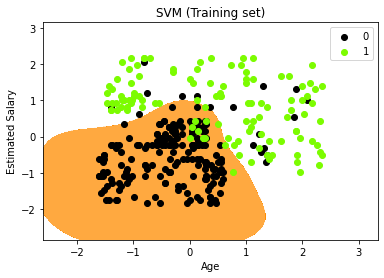

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_scaled_train, y_train
#meshgrid is to create a rectangular grid out of an array of x values and an array of y values.
X_array, Y_array = np.meshgrid(np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))
svm = SVC(C = GSCV.best_params_['C'], gamma = GSCV.best_params_['gamma'], kernel = GSCV.best_params_['kernel']).fit(X_scaled_train, y_train)
plt.contourf(X_array, Y_array, svm.predict(np.array([Y_array.ravel(), X_array.ravel()]).T).reshape(X_array.shape),
             alpha = 0.75, cmap = ListedColormap(('darkorange', 'white')))
plt.xlim(X_array.min(), X_array.max())
plt.ylim(Y_array.min(), Y_array.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 1], X_set[y_set == j, 0],
                color = ListedColormap(('black', 'lawngreen'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

**(3.9)**Visualising the Test set results(4)

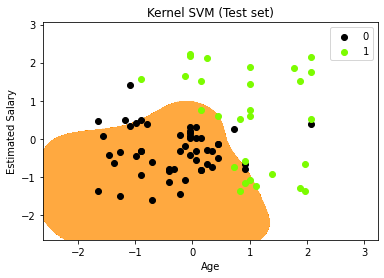

In [ ]:
#code3.9

from matplotlib.colors import ListedColormap
#code
X_set, y_set = X_scaled_test, y_test
X_array, Y_array = np.meshgrid(np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01),
                               np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01))
plt.contourf(X_array, Y_array, svm.predict(np.array([Y_array.ravel(), X_array.ravel()]).T).reshape(X_array.shape),alpha = 0.75, cmap = ListedColormap(('darkorange', 'white')))
plt.xlim(X_array.min(), X_array.max())
plt.ylim(Y_array.min(), Y_array.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color = ListedColormap(('black', 'lawngreen'))(i), label = j)

plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()